<a href="https://colab.research.google.com/github/RaicLee/Jpub_AI22/blob/master/chapter3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Activation,Dense,Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


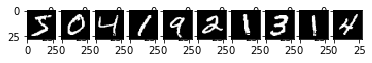

In [0]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(train_images[i],'gray')
plt.show()

In [0]:
train_images=train_images.reshape(train_images.shape[0],784)
test_images=test_images.reshape(test_images.shape[0],784)
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)
print(train_labels.shape)

(60000, 10)


In [0]:
model=Sequential()
model.add(Dense(256,activation='relu',input_shape=(784,),kernel_initializer='he_normal'))
model.add(Dense(128,activation='sigmoid'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['acc'])
history=model.fit(train_images,train_labels,batch_size=500,epochs=10,validation_split=0.2,verbose=1)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 2s 47us/sample - loss: 0.8599 - acc: 0.7543 - val_loss: 0.3573 - val_acc: 0.9072
Epoch 2/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.3642 - acc: 0.8964 - val_loss: 0.2488 - val_acc: 0.9299
Epoch 3/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.2867 - acc: 0.9160 - val_loss: 0.2160 - val_acc: 0.9359
Epoch 4/10
48000/48000 [==============================] - 2s 41us/sample - loss: 0.2424 - acc: 0.9295 - val_loss: 0.1935 - val_acc: 0.9432
Epoch 5/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.2129 - acc: 0.9375 - val_loss: 0.1689 - val_acc: 0.9497
Epoch 6/10
48000/48000 [==============================] - 2s 42us/sample - loss: 0.1892 - acc: 0.9436 - val_loss: 0.1562 - val_acc: 0.9521
Epoch 7/10
48000/48000 [===========

In [0]:
print(history.history)

{'loss': [0.8599216161916653, 0.36419958155602217, 0.28669011360034347, 0.2423622615945836, 0.21292613943417868, 0.18924324959516525, 0.17473880046357712, 0.1665701613140603, 0.14970644749701023, 0.14367732483272752], 'acc': [0.7543333, 0.89639586, 0.91595834, 0.9294583, 0.93754166, 0.94364583, 0.94808334, 0.9498125, 0.9545417, 0.9565], 'val_loss': [0.35725094998876256, 0.24882877928515276, 0.2160436554501454, 0.19346681609749794, 0.16885703491667906, 0.1562429911767443, 0.15534457936882973, 0.14229775251199803, 0.13842273907115063, 0.13544956936190525], 'val_acc': [0.90725, 0.9299167, 0.93591666, 0.9431667, 0.9496667, 0.95208335, 0.95266664, 0.9569167, 0.9576667, 0.958]}


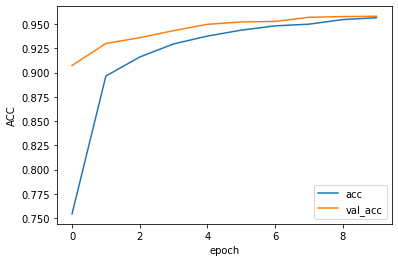

In [0]:
plt.plot(history.history['acc'],label='acc')
plt.plot(history.history['val_acc'],label='val_acc')
plt.ylabel('ACC')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.show()

In [0]:
test_loss,test_acc=model.evaluate(test_images,test_labels)
print('loss: {:3f}\nacc: {:3f}'.format(test_loss,test_acc))

10000/10000 [==============================] - 1s 52us/sample - loss: 0.1361 - acc: 0.9586
loss: 0.136074
acc: 0.958600


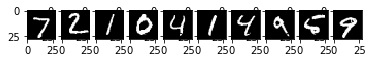

[7 2 1 0 4 1 4 9 6 9]


In [0]:
for i in range(10):
  plt.subplot(1,10,i+1)
  plt.imshow(test_images[i].reshape(28,28),'gray')
plt.show()

test_predictions=model.predict(test_images[:10])
test_predictions=np.argmax(test_predictions,axis=1)
print(test_predictions)